In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [112]:
df = pd.read_csv('data.csv')
#df.head(10)

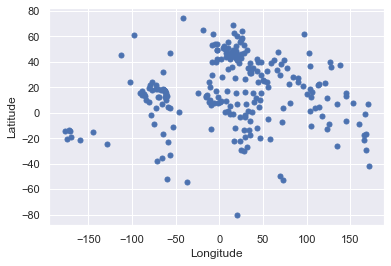

In [110]:
plt.figure()
plt.plot(df.iloc[:,1], df.iloc[:,2], marker='o', linestyle='', markersize=5)

plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.show()


In [113]:
#K-means clustering

#Longitude and Latitude variables
X=df.loc[:,['name','Latitude','Longitude']]
#X.head(10)

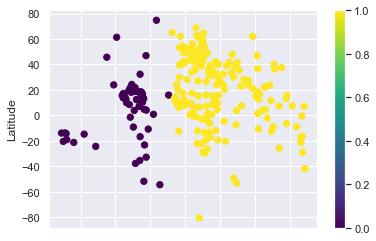

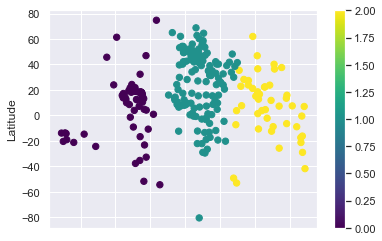

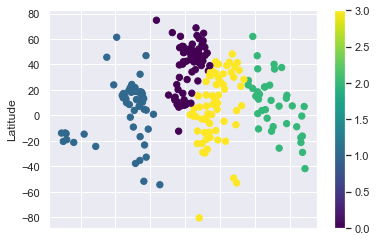

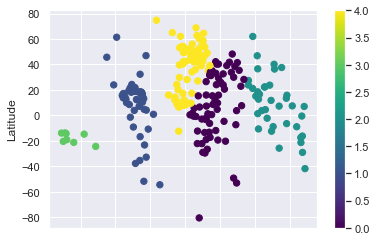

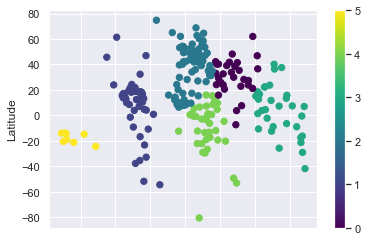

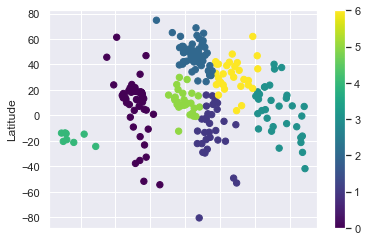

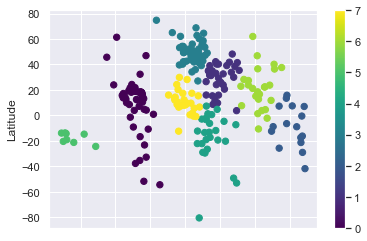

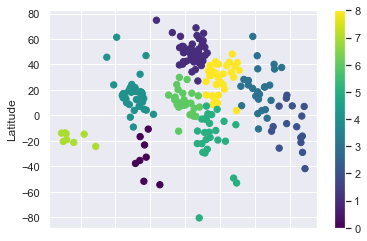

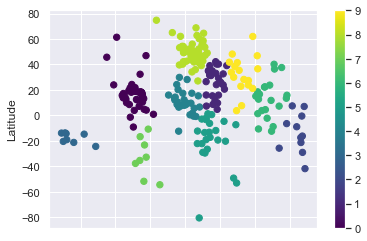

In [120]:
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++',n_init=500)
    kmeans.fit(df[X.columns[1:3]]) #k-means clustering.
    X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]]) #append cluster label to dtaset
    #centers = kmeans.cluster_centers_ # coordinates of cluster centers.
    labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
    #X.head(241)
    
    X.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels, s=40, cmap='viridis')
    #plt.scatter(centers[:, 0], centers[:, 1], c='black', s=80, alpha=0.5)
    #print("K = ", i)


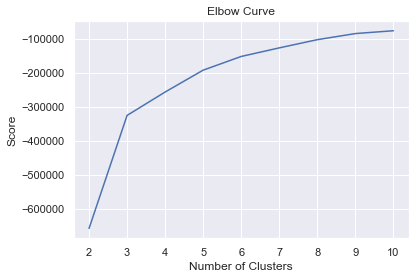

In [122]:
#determine number of clusters using elbow method
K_clusters = range(2,11)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
#score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
score = [kmeans[i].fit(df[X.columns[1:3]]).score(df[X.columns[1:3]]) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


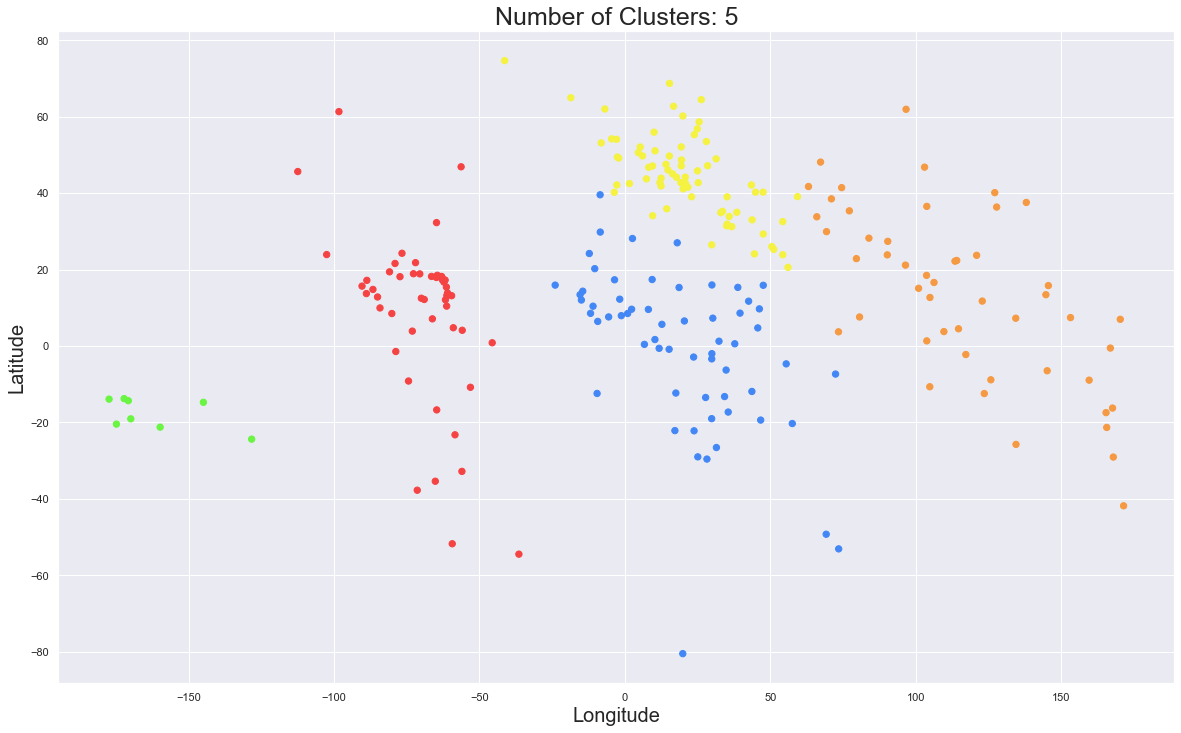

In [104]:
#GMM
import sklearn.mixture as sm
import matplotlib.pyplot as plt
%matplotlib inline

def plot_gmm(n):    
    #Fit gmm and get labels
    x = df[['Longitude','Latitude']].values
    gmm = sm.GaussianMixture(n_components=n, random_state=11,n_init=500)
    labels = gmm.fit(x).predict(x)
    #print(labels)
    #print(gmm.means_)
    #print('\n')
    #print(gmm.covariances_)
    
    #assign a colour to each label
    colour = ['#f54242','#4287f5','#f59942','#f5f242','#69f542','#b342f5']
    c = [colour[l] for l in labels]
    
    #scatter plot
    plt.figure(figsize=(20, 12))
    plt.scatter(x=x[:, 0], y=x[:, 1], c=c, s=40, cmap='viridis', zorder=1)
    plt.title('Number of Clusters: {}'.format(n),size=25)
    plt.xlabel('Longitude',size=20)
    plt.ylabel('Latitude',size=20)
    
plot_gmm(5)


In [135]:
x = df[['Longitude','Latitude']].values
gmm = sm.GaussianMixture(n_components=5, random_state=11,n_init=500)
gmm.fit(x)
print("Mean of each Gaussian")
print(gmm.means_)
#print('\n')
print("Covariance of each Gaussian")
print(gmm.covariances_)
probs = gmm.predict_proba(x)
print("Log Likelihood for 2 samples belonging to each Gaussian")
#print(probs[:2].round(3))
print(np.log(probs[:2]))
#score = gmm.score(x[])
#print(score.round(3))


Mean of each Gaussian
[[ -69.75270797    9.02505654]
 [  19.24588594    2.9439492 ]
 [ 115.2381996    13.54058327]
 [  22.31124442   44.1258939 ]
 [-162.24003452  -17.71618931]]
Covariance of each Gaussian
[[[ 192.09276045 -147.56552563]
  [-147.56552563  471.08056875]]

 [[ 581.17657648 -261.74312416]
  [-261.74312416  539.30924614]]

 [[1116.50263616 -502.96074632]
  [-502.96074632  513.0823562 ]]

 [[ 397.45797317 -151.64025063]
  [-151.64025063  127.55161663]]

 [[ 259.01842471  -33.00979318]
  [ -33.00979318   14.5725582 ]]]
Log Likelihood for 2 samples belonging to each Gaussian
[[1.    0.    0.    0.    0.   ]
 [0.    0.014 0.505 0.48  0.   ]]
[[-2.37976680e-04 -8.34345686e+00 -2.86338943e+01 -4.20144297e+01
  -1.01727114e+02]
 [-7.00212505e+01 -4.23444711e+00 -6.83038224e-01 -7.33069435e-01
  -4.13227748e+02]]


In [124]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, x, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(x).predict(x)
    if label:
        ax.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(x[:, 0], x[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

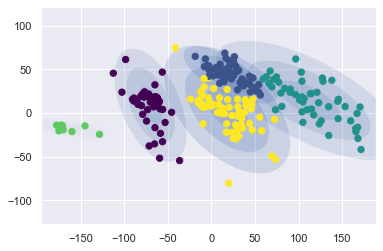

In [125]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full',n_init=500)
#gmm = GMM(n_components=5, random_state=42)
plot_gmm(gmm, x)